In [1]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("ipl.csv")

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df.shape

(76014, 15)

In [5]:
df.drop(['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker'],1,inplace=True)

In [6]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [7]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [8]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [9]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [10]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [11]:
df.bat_team=np.where(df.bat_team=='Kolkata Knight Riders','KKR',df.bat_team)
df.bat_team=np.where(df.bat_team=='Chennai Super Kings','CSK',df.bat_team)
df.bat_team=np.where(df.bat_team=='Mumbai Indians','MI',df.bat_team)
df.bat_team=np.where(df.bat_team=='Kings XI Punjab','KXIP',df.bat_team)
df.bat_team=np.where(df.bat_team=='Royal Challengers Bangalore','RCB',df.bat_team)
df.bat_team=np.where(df.bat_team=='Delhi Daredevils','DD',df.bat_team)
df.bat_team=np.where(df.bat_team=='Sunrisers Hyderabad','SRH',df.bat_team)
df.bat_team=np.where(df.bat_team=='Rajasthan Royals','RR',df.bat_team)

In [12]:
df.bowl_team=np.where(df.bowl_team=='Kolkata Knight Riders','KKR',df.bowl_team)
df.bowl_team=np.where(df.bowl_team=='Chennai Super Kings','CSK',df.bowl_team)
df.bowl_team=np.where(df.bowl_team=='Mumbai Indians','MI',df.bowl_team)
df.bowl_team=np.where(df.bowl_team=='Kings XI Punjab','KXIP',df.bowl_team)
df.bowl_team=np.where(df.bowl_team=='Royal Challengers Bangalore','RCB',df.bowl_team)
df.bowl_team=np.where(df.bowl_team=='Delhi Daredevils','DD',df.bowl_team)
df.bowl_team=np.where(df.bowl_team=='Sunrisers Hyderabad','SRH',df.bowl_team)
df.bowl_team=np.where(df.bowl_team=='Rajasthan Royals','RR',df.bowl_team)

In [13]:
df.bowl_team.unique()

array(['RCB', 'KXIP', 'DD', 'RR', 'MI', 'CSK', 'KKR', 'SRH'], dtype=object)

In [14]:
df.bat_team.unique()

array(['KKR', 'CSK', 'RR', 'MI', 'KXIP', 'RCB', 'DD', 'SRH'], dtype=object)

In [15]:
df.shape

(53811, 9)

In [16]:
df = df[df['overs']>=5.0]

In [17]:
df.shape

(40108, 9)

In [18]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [19]:
df

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,KKR,RCB,61,0,5.1,59,0,222
33,2008-04-18,KKR,RCB,61,1,5.2,59,1,222
34,2008-04-18,KKR,RCB,61,1,5.3,59,1,222
35,2008-04-18,KKR,RCB,61,1,5.4,59,1,222
36,2008-04-18,KKR,RCB,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,KKR,MI,106,9,18.1,29,4,107
75885,2017-05-19,KKR,MI,107,9,18.2,29,4,107
75886,2017-05-19,KKR,MI,107,9,18.3,28,4,107
75887,2017-05-19,KKR,MI,107,9,18.4,24,4,107


In [20]:
df = pd.get_dummies(df)

In [21]:
df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_CSK,bat_team_DD,bat_team_KKR,...,bat_team_RR,bat_team_SRH,bowl_team_CSK,bowl_team_DD,bowl_team_KKR,bowl_team_KXIP,bowl_team_MI,bowl_team_RCB,bowl_team_RR,bowl_team_SRH
32,2008-04-18,61,0,5.1,59,0,222,0,0,1,...,0,0,0,0,0,0,0,1,0,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,1,...,0,0,0,0,0,0,0,1,0,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,1,...,0,0,0,0,0,0,0,1,0,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,1,...,0,0,0,0,0,0,0,1,0,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [22]:
df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_CSK', 'bat_team_DD', 'bat_team_KKR', 'bat_team_KXIP',
       'bat_team_MI', 'bat_team_RCB', 'bat_team_RR', 'bat_team_SRH',
       'bowl_team_CSK', 'bowl_team_DD', 'bowl_team_KKR', 'bowl_team_KXIP',
       'bowl_team_MI', 'bowl_team_RCB', 'bowl_team_RR', 'bowl_team_SRH'],
      dtype='object')

In [23]:
X_train=df.drop('total',1)[df.date.dt.year<=2016]
X_test=df.drop('total',1)[df.date.dt.year>=2017]

In [24]:
X_train

,date,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_CSK,bat_team_DD,bat_team_KKR,bat_team_KXIP,...,bat_team_RR,bat_team_SRH,bowl_team_CSK,bowl_team_DD,bowl_team_KKR,bowl_team_KXIP,bowl_team_MI,bowl_team_RCB,bowl_team_RR,bowl_team_SRH
32,2008-04-18,61,0,5.1,59,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
33,2008-04-18,61,1,5.2,59,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
34,2008-04-18,61,1,5.3,59,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
35,2008-04-18,61,1,5.4,59,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
36,2008-04-18,61,1,5.5,58,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,2016-05-29,194,7,19.2,54,4,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
68858,2016-05-29,200,7,19.3,56,4,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
68859,2016-05-29,201,7,19.4,56,4,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
68860,2016-05-29,202,7,19.5,57,4,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [25]:
y_train=df['total'][df.date.dt.year<=2016].values
y_test=df['total'][df.date.dt.year>=2017].values

In [26]:
y_train

array([222, 222, 222, ..., 208, 208, 208], dtype=int64)

In [27]:
len(X_train),len(y_train)

(37330, 37330)

In [28]:
len(X_test),len(y_test)

(2778, 2778)

In [29]:
X_train.drop('date',1,inplace=True)
X_test.drop('date',1,inplace=True)

In [30]:
X_train

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_CSK,bat_team_DD,bat_team_KKR,bat_team_KXIP,bat_team_MI,...,bat_team_RR,bat_team_SRH,bowl_team_CSK,bowl_team_DD,bowl_team_KKR,bowl_team_KXIP,bowl_team_MI,bowl_team_RCB,bowl_team_RR,bowl_team_SRH
32,61,0,5.1,59,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
33,61,1,5.2,59,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
34,61,1,5.3,59,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
35,61,1,5.4,59,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
36,61,1,5.5,58,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,194,7,19.2,54,4,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
68858,200,7,19.3,56,4,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
68859,201,7,19.4,56,4,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
68860,202,7,19.5,57,4,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


# Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
y_train_pred=lr.predict(X_train)

In [35]:
y_test_pred=lr.predict(X_test)

In [36]:
len(y_train)

37330

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

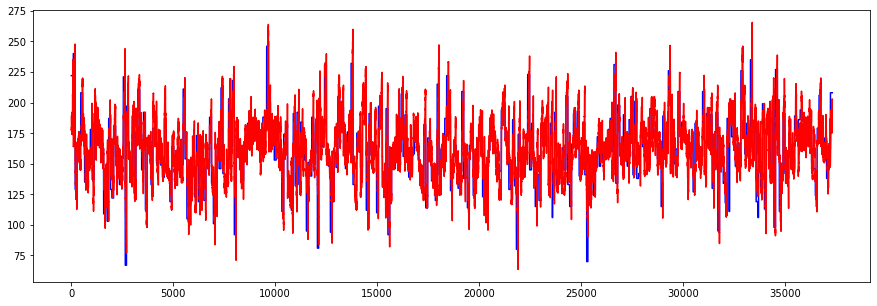

In [37]:
c=[i for i in range(1,37331,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,y_train,color='blue')
plt.plot(c,y_train_pred,color='red')
plt.show()

In [38]:
len(y_test)

2778

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

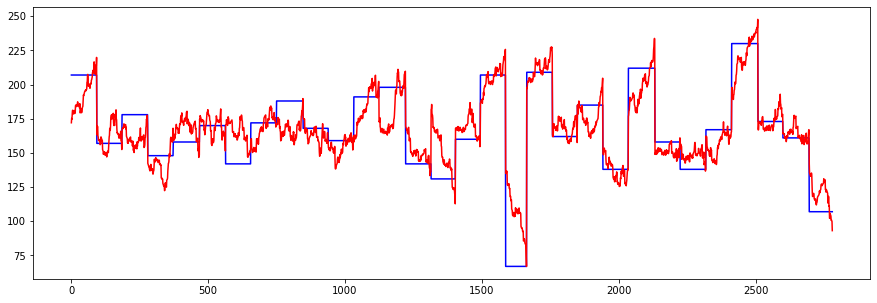

In [39]:
c=[i for i in range(1,2779,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,y_test,color='blue')
plt.plot(c,y_test_pred,color='red')
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error,r2_score

In [41]:
print("R square value for training data:",r2_score(y_train,y_train_pred))

R square value for training data: 0.6502133812161469


In [42]:
print("R square value for testing data:",r2_score(y_test,y_test_pred))

R square value for testing data: 0.7522633566350542


In [43]:
print("RMSE Value for training data",np.sqrt(mean_squared_error(y_train,y_train_pred)))

RMSE Value for training data 17.530606671826085


In [44]:
print("RMSE Value for testing data",np.sqrt(mean_squared_error(y_test,y_test_pred)))

RMSE Value for testing data 15.843229566732058


In [45]:
print("MSE Value for training data",(mean_squared_error(y_train,y_train_pred)))

MSE Value for training data 307.32217028227325


In [46]:
print("RMSE Value for testing data",(mean_squared_error(y_test,y_test_pred)))

RMSE Value for testing data 251.00792310417287


# Ridge Regression

In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [48]:
ridge=Ridge()

In [49]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,15,20,30,35,40]}

In [50]:
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [51]:
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   15, 20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [52]:
ridge_regressor.best_params_

{'alpha': 40}

In [53]:
ridge_regressor.best_score_

-328.4152792487923

In [54]:
pred=ridge_regressor.predict(X_test)

<IPython.core.display.Javascript object>

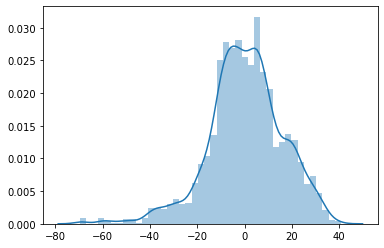

In [55]:
sns.distplot(y_test-pred)

In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [57]:
print("Mean Squared Error:",mean_squared_error(pred,y_test))

Mean Squared Error: 251.03172964112676


In [58]:
print("RMSE:",np.sqrt(mean_squared_error(pred,y_test)))

RMSE: 15.843980864704639


In [59]:
print("Absolute Mean Error:",mean_absolute_error(pred,y_test))

Absolute Mean Error: 12.11729452700503


# Lasso Regression

In [60]:
from sklearn.linear_model import Lasso

In [61]:
lasso=Lasso()

In [62]:
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [63]:
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   15, 20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [64]:
pred=lasso_regressor.predict(X_test)

In [65]:
print("Mean Squared Error:",mean_squared_error(pred,y_test))

Mean Squared Error: 262.3653827960697


In [66]:
print("RMSE:",np.sqrt(mean_squared_error(pred,y_test)))

RMSE: 16.197696836157593


In [67]:
print("Absolute Mean Error:",mean_absolute_error(pred,y_test))

Absolute Mean Error: 12.213583996827493


<IPython.core.display.Javascript object>

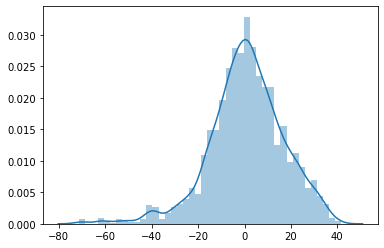

In [68]:
sns.distplot(y_test-pred)

In [69]:
lasso_regressor.best_params_

{'alpha': 1}

In [70]:
lasso_regressor.best_score_

-320.8221491680912

In [75]:
file=open('iplscore.pkl','wb')
pickle.dump(lasso_regressor,file)